In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('DataEngineer.csv')
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


In [24]:
data.isnull().sum()

In [25]:
data['Company Name'] = data['Company Name'].str.replace('\n.*','')

loc = data['Location'].str.split(',', expand = True)
city = loc[0]
data['City'] = loc[0]
data['Region'] = loc[1]
salary = data['Salary Estimate'].str.split('-', expand = True)
min_salary = salary[0].str.replace('$', '').str.replace('K', '')
max_salary = salary[1].str.replace('$', '').str.replace('K', '').str.replace('\(G.*', '')
data['Min Salary'] = min_salary
data['Max Salary'] = max_salary

data.drop(['Headquarters', 'Location', 'Competitors', 'Easy Apply', 'Revenue','Size', 'Salary Estimate'], axis=1, inplace = True)
data['Job Title'] = data['Job Title'].str.replace('Sr.', 'Senior')
data['Type of ownership'] = data['Type of ownership'].str.replace('-1', ' не указано')
data.head()

,Job Title,Job Description,Rating,Company Name,Founded,Type of ownership,Industry,Sector,City,Region,Min Salary,Max Salary
0,Data Engineer,Company Description\nSagence is a management a...,4.5,Sagence,2009,Company - Private,Consulting,Business Services,New York,NY,80,150
1,Senior Data Engineer (Healthcare Domain experi...,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,1998,Company - Private,IT Services,Information Technology,New York,NY,80,150
2,Data Engineers,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,2003,Company - Private,IT Services,Information Technology,New York,NY,80,150
3,Client Trade Support Engineer,About the Position\n\n\nThis position will sup...,4.8,Jane Street,2000,Company - Private,Investment Banking & Asset Management,Finance,New York,NY,80,150
4,Data Engineer,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies,1914,Company - Private,Insurance Carriers,Insurance,New York,NY,80,150


In [26]:
count_jb = data['Job Title'].value_counts().rename_axis('Job Title').reset_index(name= 'Counts').head(10)

In [27]:
company = data.groupby('Company Name', as_index= False)['Job Title'].count().sort_values('Job Title', ascending= False).head(10)
company.head()

,Company Name,Job Title
83,Amazon,28
760,Lockheed Martin,18
111,Apple,18
665,IntraEdge,16
597,Humana,16


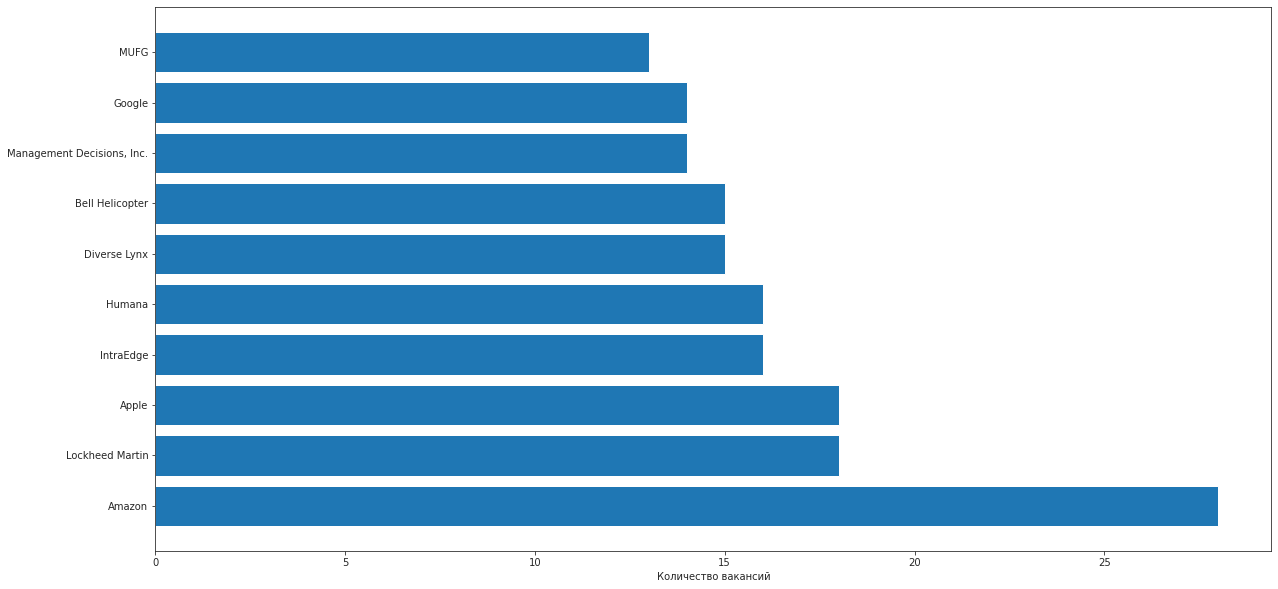

In [28]:
plt.figure(figsize=(20,10))
plt.barh(company['Company Name'], company['Job Title'])

plt.xlabel('Количество вакансий')
plt.show()

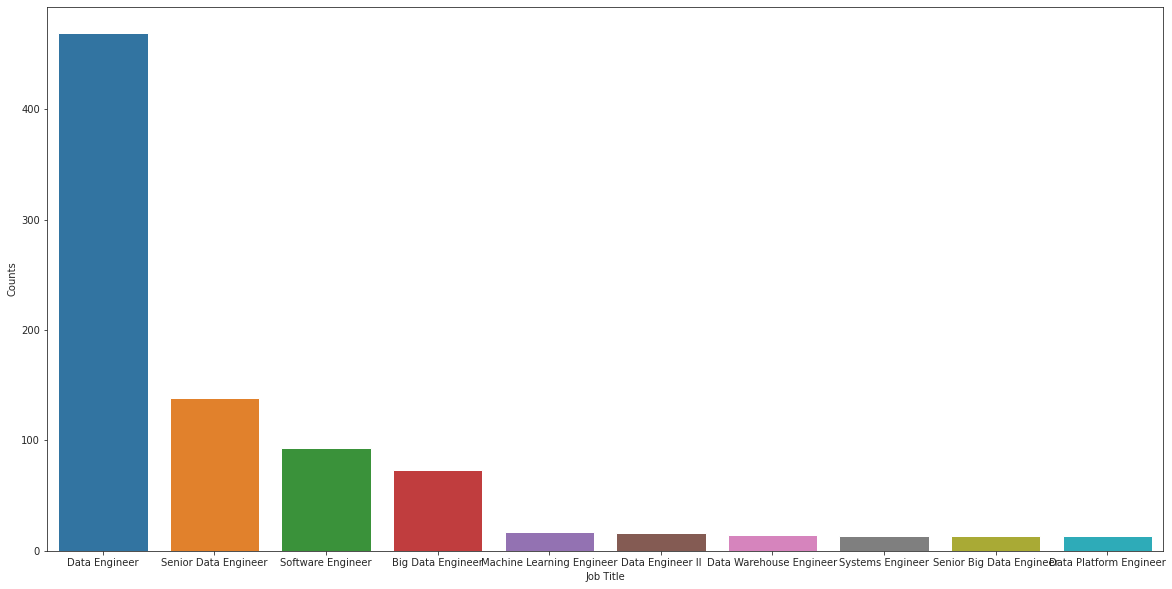

In [29]:
plt.figure(figsize=(20,10))
sns.set_style("ticks", {"xtick.major.size": 30, "ytick.major.size": 30,})
sns.barplot(x= 'Job Title', y= 'Counts', data= count_jb)
plt.show()

In [30]:
regions= data.groupby('Region', as_index = False)[['Job Title']].count().sort_values('Job Title', ascending = False).head(10)

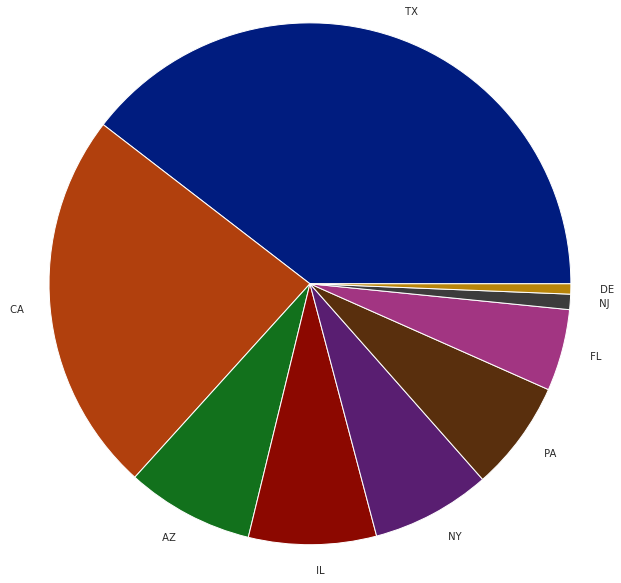

In [31]:
plt.pie(regions['Job Title'], labels= regions['Region'], colors=sns.color_palette('dark'), radius=3)
plt.show()

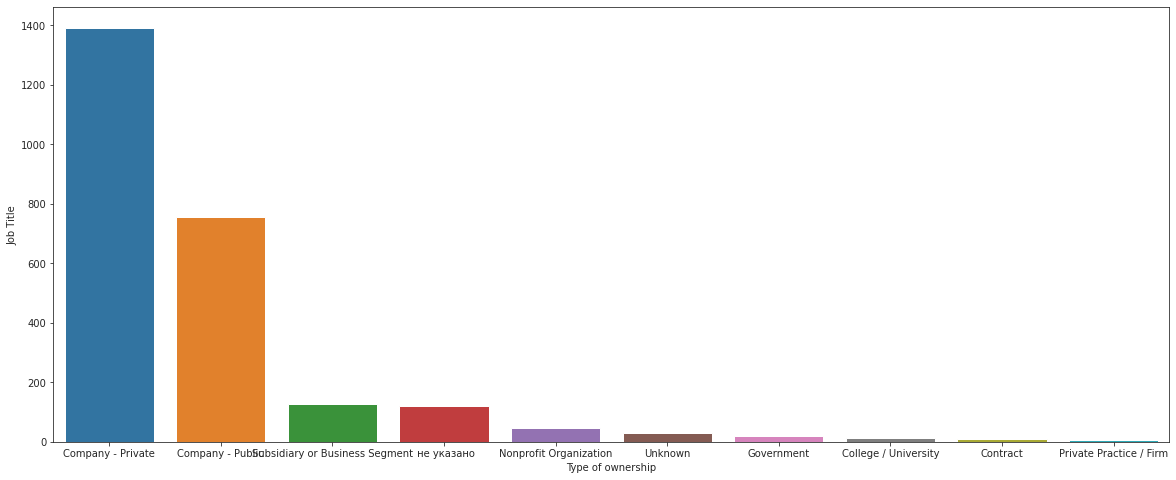

In [32]:
owner = data.groupby('Type of ownership', as_index = False)[['Job Title']].count().sort_values('Job Title', ascending = False).head(10)
plt.figure(figsize=(20,8))
sns.set_style("ticks", {"xtick.major.size": 30, "ytick.major.size": 30,})
sns.barplot(x= 'Type of ownership', y= 'Job Title', data=owner)
plt.show()

In [33]:
branch_df = data.groupby('Sector', as_index = False)[['Job Title']].count()
branch_df = branch_df.drop([0]).sort_values('Job Title', ascending = False).head(10)

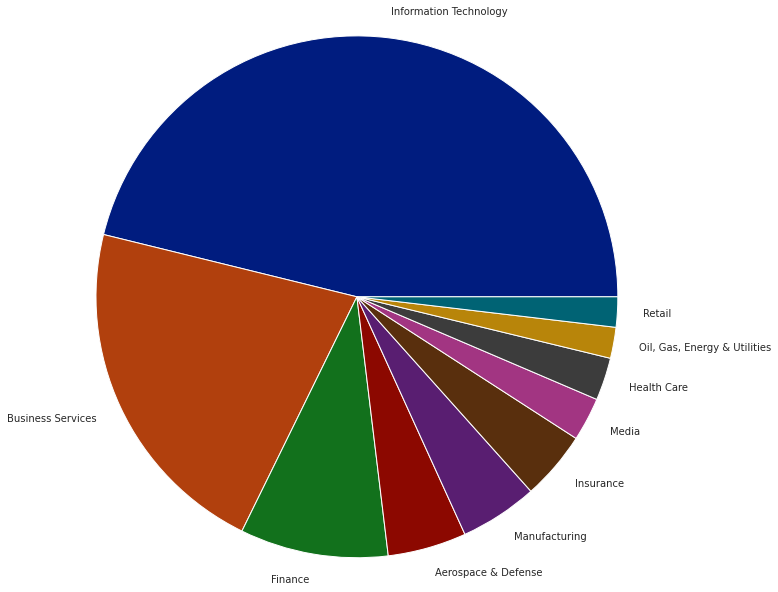

In [34]:
plt.pie(branch_df['Job Title'], labels=branch_df['Sector'], colors=sns.color_palette('dark'), radius=3)
plt.show()

In [35]:
data['Min Salary'] = data['Min Salary'].str.strip()
data['Min Salary'] = data['Min Salary'].str.lstrip()
data['Max Salary'] = data['Max Salary'].str.strip()
data['Max Salary'] = data['Max Salary'].str.lstrip()

In [36]:
data['Max Salary'] = data['Max Salary'].str.replace('\(Employer est.\)', '')
convert_dict = {'Max Salary': int,'Min Salary': int}
data = data.astype(convert_dict)

In [37]:
data_filtered = data.groupby('Region', as_index = False)[['Min Salary', 'Max Salary']].mean()
data_filtered['Region']

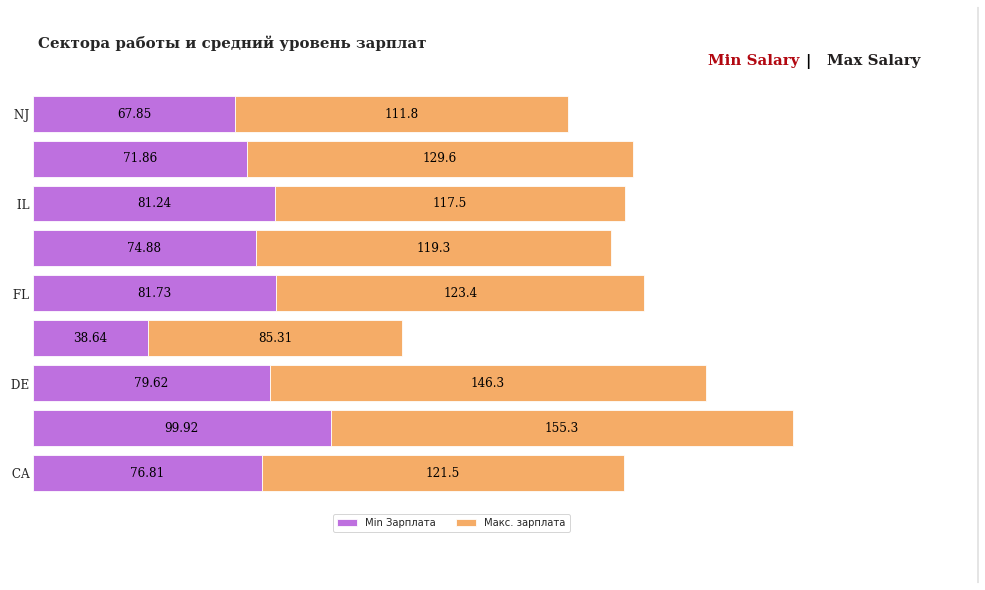

In [38]:
fig, ax = plt.subplots(1,1,figsize=(15, 8),)
ax.barh(data_filtered.index, data_filtered['Min Salary'], color='#ae4cd7', alpha=0.8, label='Min Зарплата')
ax.barh(data_filtered.index, data_filtered['Max Salary'], left=data_filtered['Min Salary'], color='#f39741', alpha=0.8, label='Макс. зарплата')


ax.set_xlim(0, 281)
#ax.set_ylim(0,2)
ax.set_xticks([])
ax.set_yticklabels(data_filtered['Region'], fontfamily = 'serif', fontsize = 11)


# male percentage
for i in data_filtered['Min Salary'].index:
    ax.annotate(f"{data_filtered['Min Salary'][i]:.4}", xy=(data_filtered['Min Salary'][i]/2, i), va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif', color='black')

for i in data_filtered['Min Salary'].index:
    ax.annotate(f"{data_filtered['Max Salary'][i]:.4}", xy=(data_filtered['Min Salary'][i] + data_filtered['Max Salary'][i]/2, i),
                va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                color='black')
    

fig.text(0.13, 0.93, 'Сектора работы и средний уровень зарплат', fontsize=15, fontweight='bold', fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Min Salary", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.84,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.86,0.9,"Max Salary", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')




import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

<AxesSubplot:>

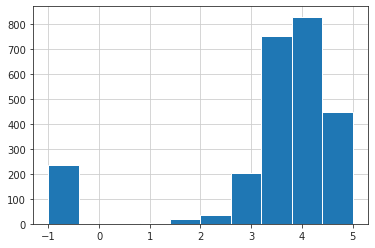

In [39]:
data['Rating'].hist()

In [40]:
data.groupby(['Company Name','Rating','Min Salary'], as_index = False)['Rating'].count()

,Company Name,Min Salary,Rating
0,12traits,115,1
1,"1819, LLC",54,1
2,22nd Century Staffing,79,1
3,22nd Century Technologies,28,1
4,22nd Century Technologies,59,1
...,...,...,...
2265,realtor.com,77,1
2266,sensemetrics,191,2
2267,softsnippets,44,1
2268,thredUP,79,1


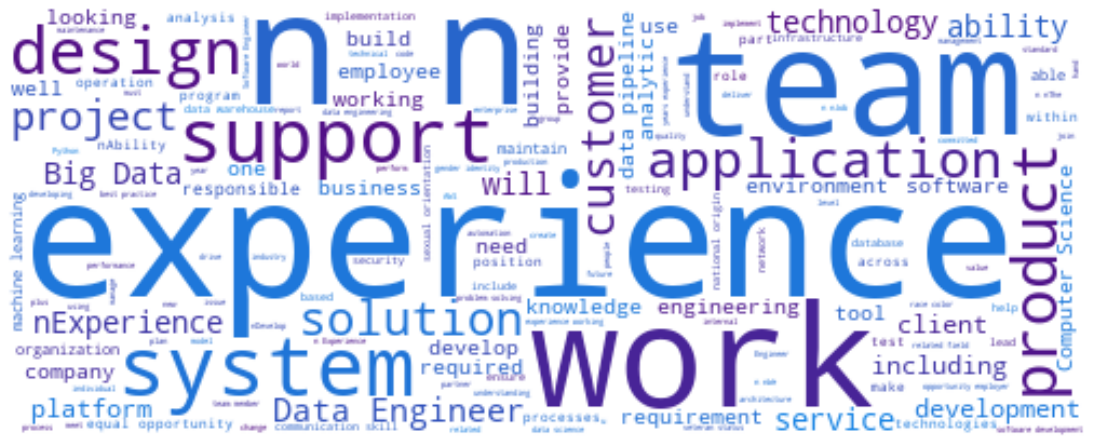

In [42]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#530e85', '#1785e5'])

text = str(list(data['Job Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()